In [30]:
import numpy as np
from numpy.linalg import eig
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from scipy.stats import pearsonr
import scipy
import gzip
import scipy.io
import math

In [31]:
def scale2one (data):
    for i in range (np.size(data)):
        scale=data[i]-min(data)
        data[i]=scale/max(data)
        
    return data

def imgplts (data):
    for i in range (5):
        plt.figure(figsize=(20,10))
        plt.subplot(5, 5, i+1)
        plt.plot(data[i,:]) 
    return


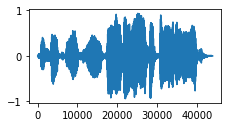

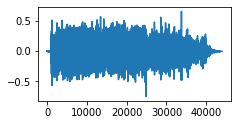

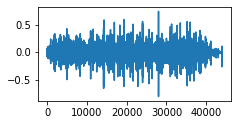

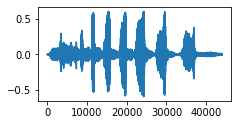

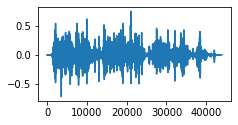

In [32]:
U = scipy.io.loadmat('sounds.mat')
U=U['sounds']
L=np.shape(U) [1]
t= [i for i in range(L)]

imgplts(U)


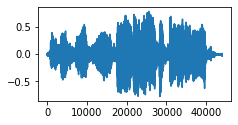

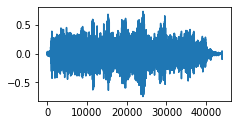

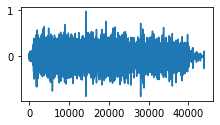

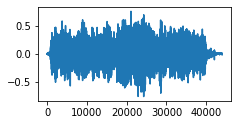

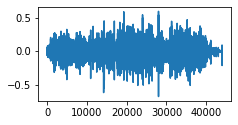

In [33]:
#Mixing the sounds
A=np.random.rand(5,5)
X=np.matmul(A,U)

imgplts(X)

In [34]:
# ICA Algorithm
W=np.random.rand(5,5)*.1
print(W)
nu= 5e-7

for i in range (5000):
    Y=np.dot(W,X)
    Z=1/(1+np.exp(-Y))
    dW=nu*np.dot((np.eye(5)*L + np.dot((1-2*Z),np.transpose(Y))),W)
    W=W+dW
    


[[0.04511258 0.07073455 0.06208855 0.08961743 0.08050507]
 [0.06372623 0.02077183 0.08094735 0.00332634 0.05132865]
 [0.03985244 0.01731681 0.07565261 0.01822974 0.07029416]
 [0.05123167 0.02607925 0.05926892 0.06232337 0.02756604]
 [0.04348787 0.06069416 0.03671035 0.09053144 0.03467716]]


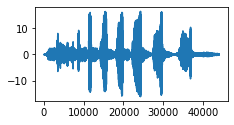

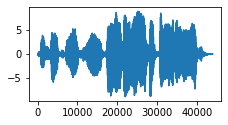

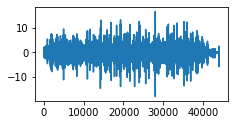

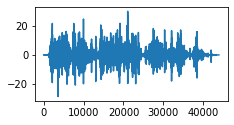

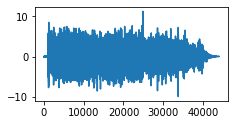

In [35]:
imgplts(Y)


In [51]:
C=np.corrcoef(Y,U)
C=np.abs(C)
Corr=np.zeros(5)
    
for i in range (5):
    B=np.where(C[i]<1,C[i],0)
    Corr[i]=np.max(B)
    
Corr



array([0.99993796, 0.99996491, 0.99986743, 0.99993835, 0.9999279 ])

In [50]:
C
    

array([[ 1.00000000e+00,  1.58995055e-03, -2.08976522e-03,
         2.05467446e-03, -1.09166997e-03,  2.98715301e-03,
        -2.75099834e-04, -9.53023686e-03,  9.99937964e-01,
         5.12512461e-03],
       [ 1.58995055e-03,  1.00000000e+00,  3.05690900e-04,
        -8.02514933e-04,  6.95447579e-04,  9.99964908e-01,
         1.55870154e-03,  7.33227496e-04,  4.12047048e-03,
        -1.40799040e-03],
       [-2.08976522e-03,  3.05690900e-04,  1.00000000e+00,
         1.83378899e-03,  1.22358718e-03, -3.48869345e-03,
        -1.25553296e-02,  9.99867433e-01, -1.02426418e-02,
         1.24709568e-02],
       [ 2.05467446e-03, -8.02514933e-04,  1.83378899e-03,
         1.00000000e+00, -1.57431628e-03, -3.19127832e-03,
        -1.40691408e-03, -2.60312928e-03,  2.03785904e-03,
         9.99938352e-01],
       [-1.09166997e-03,  6.95447579e-04,  1.22358718e-03,
        -1.57431628e-03,  1.00000000e+00,  7.63332545e-03,
        -9.99927904e-01, -1.25456520e-02, -8.25377185e-03,
        -2.